In [9]:
from bs4 import BeautifulSoup
from lxml import html
from lxml import etree
import xml
import requests
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
import json
import pandas as pd
from pandas.io.json import json_normalize

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "E:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "E:\Anaconda\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asynci

In [38]:
url = "https://warframe.market/items/vauban_prime_set/statistics"
r = requests.get(url).text
s=etree.HTML(r)
trade=s[4].text
print(trade[0:100])

{"payload": {"statistics_closed": {"48hours": [{"datetime": "2019-04-16T07:00:00.000+00:00", "volume


In [39]:
data=json.loads(trade)
data1=data['payload']['statistics_closed']['90days']
print(data1[0:2])

[{'datetime': '2019-01-19T00:00:00.000+00:00', 'volume': 36, 'min_price': 190, 'max_price': 215, 'open_price': 209, 'closed_price': 193, 'avg_price': 202.5, 'wa_price': 197.639, 'median': 199.0, 'moving_avg': 194.7, 'donch_top': 215, 'donch_bot': 164, 'id': '5c43ba893ae3e8002394b31a'}, {'datetime': '2019-01-20T00:00:00.000+00:00', 'volume': 22, 'min_price': 190, 'max_price': 205, 'open_price': 190, 'closed_price': 190, 'avg_price': 197.5, 'wa_price': 198.545, 'median': 200.0, 'moving_avg': 195.2, 'donch_top': 215, 'donch_bot': 164, 'id': '5c450c083ae3e80023966364'}]


In [40]:
time=np.array([])
volume=np.array([])
min_price=np.array([])
max_price=np.array([])
avg_price=np.array([])
median_price=np.array([])
warframe=np.array([])

In [41]:
for i in range (0,89):
    time=np.append(time,data1[i]['datetime'][0:10])
    volume=np.append(volume,data1[i]['volume'])
    min_price=np.append(min_price,data1[i]['min_price'])
    max_price=np.append(max_price,data1[i]['max_price'])
    avg_price=np.append(avg_price,data1[i]['avg_price'])
    median_price=np.append(median_price,data1[i]['median'])
    warframe=np.append(warframe,'Vauban')
print(time[0:10])

['2019-01-19' '2019-01-20' '2019-01-21' '2019-01-22' '2019-01-23'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-27' '2019-01-28']


In [42]:
trading=Table().with_columns('time',time,'volume',volume,'min_price',min_price,'max_price',max_price,'avg_price',avg_price,'median_price',median_price,'warframe',warframe)
trading

time,volume,min_price,max_price,avg_price,median_price,warframe
2019-01-19,36,190,215,202.5,199,Vauban
2019-01-20,22,190,205,197.5,200,Vauban
2019-01-21,28,180,220,200,200,Vauban
2019-01-22,38,160,230,195,195,Vauban
2019-01-23,18,176,215,195.5,200,Vauban
2019-01-24,18,185,200,192.5,195,Vauban
2019-01-25,31,179,210,194.5,190,Vauban
2019-01-26,21,180,200,190,189.5,Vauban
2019-01-27,26,175,195,185,185,Vauban
2019-01-28,20,180,199,189.5,187.5,Vauban


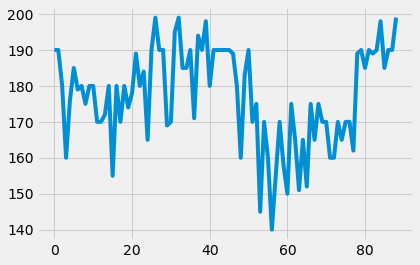

In [43]:
plt.plot(trading[2])

In [44]:
trading.to_csv('Vauban.csv')